In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [3]:
# Model 함수 구현
def model_fu(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [4]:
model = model_fu()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
histrory = model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5274 - accuracy: 0.8145
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3908 - accuracy: 0.8607
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3536 - accuracy: 0.8734
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3319 - accuracy: 0.8815
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3166 - accuracy: 0.8867


In [6]:
histrory.history.keys()

dict_keys(['loss', 'accuracy'])

### 손실곡선

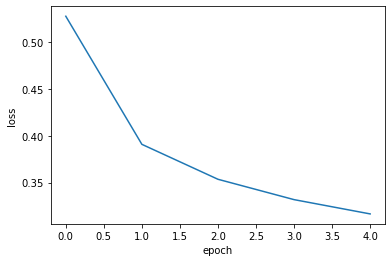

In [7]:
import matplotlib.pyplot as plt

plt.plot(histrory.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

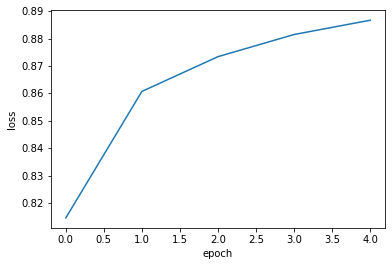

In [8]:
plt.plot(histrory.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 반복훈련의 증가


In [9]:
model = model_fu()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
histrory = model.fit(train_scaled,train_target,epochs=20)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5291 - accuracy: 0.8139
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3906 - accuracy: 0.8602
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3539 - accuracy: 0.8724
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3329 - accuracy: 0.8809
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3201 - accuracy: 0.8855
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3073 - accuracy: 0.8914
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8952
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2891 - accuracy: 0.8985
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2819 - accuracy: 0.9010
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.276

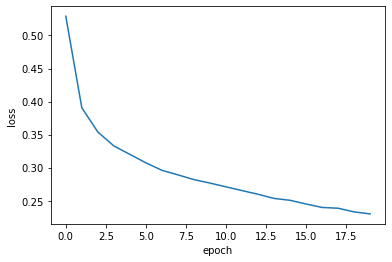

In [10]:
plt.plot(histrory.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

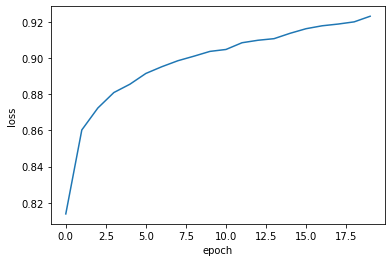

In [11]:
plt.plot(histrory.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

> 검증세트를 만든 이유 => 과대적합 파악하기 위해서

---
### 검증 손실
: 검증 세트에 대한 정확도를 파악하기 위해 validation data를 사용한다.

In [12]:
model = model_fu()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
histrory = model.fit(train_scaled,train_target,epochs=20,
                        validation_data = (val_scaled,val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5326 - accuracy: 0.8125 - val_loss: 0.4408 - val_accuracy: 0.8457
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3915 - accuracy: 0.8587 - val_loss: 0.4031 - val_accuracy: 0.8569
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3532 - accuracy: 0.8727 - val_loss: 0.3657 - val_accuracy: 0.8702
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3336 - accuracy: 0.8809 - val_loss: 0.3756 - val_accuracy: 0.8698
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3174 - accuracy: 0.8859 - val_loss: 0.3546 - val_accuracy: 0.8797
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3049 - accuracy: 0.8923 - val_loss: 0.3740 - val_accuracy: 0.8756
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8933 - val_loss: 0.3868 - val_accuracy:

In [13]:
histrory.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

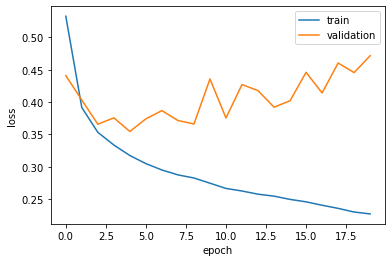

In [14]:
plt.plot(histrory.history['loss'])
plt.plot(histrory.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

> 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나    
> 검증세트는 epochs으 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.    
> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.   

---
### Optimizer(adam)

In [15]:
model = model_fu()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
histrory = model.fit(train_scaled,train_target,epochs=20,
                        validation_data = (val_scaled,val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5190 - accuracy: 0.8170 - val_loss: 0.4225 - val_accuracy: 0.8466
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3875 - accuracy: 0.8618 - val_loss: 0.4089 - val_accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3510 - accuracy: 0.8712 - val_loss: 0.3541 - val_accuracy: 0.8723
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3248 - accuracy: 0.8806 - val_loss: 0.3432 - val_accuracy: 0.8744
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3057 - accuracy: 0.8876 - val_loss: 0.3510 - val_accuracy: 0.8773
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2884 - accuracy: 0.8926 - val_loss: 0.3572 - val_accuracy: 0.8731
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2740 - accuracy: 0.8988 - val_loss: 0.3409 - val_accuracy:

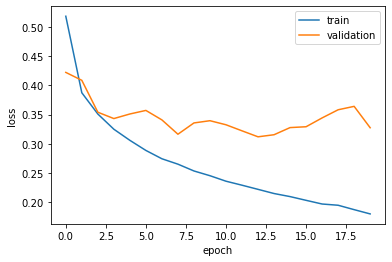

In [16]:
plt.plot(histrory.history['loss'])
plt.plot(histrory.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

> 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나    
> 검증세트는 epochs으 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.    
> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.   
> Optimizer(최적화 알고리즘)을 사용한 것이 좀 더 나은 모델이나 검증손실에 대한 부분(과대적합)은 아직 해결이 안됨

---
# Dropout
- 규제
- 신경망 모델에만 있음
- 훈련 시에만 각 sample을 처리할 때, 은닉층의 임의의 node를 계산에 포함시키지 않는다

In [17]:
# model에 dropout을 추가

model = model_fu(keras.layers.Dropout(0.3)) # dropout 30%
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
histrory = model.fit(train_scaled,train_target,epochs=20,
                        validation_data = (val_scaled,val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5889 - accuracy: 0.7924 - val_loss: 0.4316 - val_accuracy: 0.8441
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4408 - accuracy: 0.8409 - val_loss: 0.3847 - val_accuracy: 0.8614
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4049 - accuracy: 0.8521 - val_loss: 0.3709 - val_accuracy: 0.8629
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3834 - accuracy: 0.8612 - val_loss: 0.3632 - val_accuracy: 0.8696
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3710 - accuracy: 0.8630 - val_loss: 0.3515 - val_accuracy: 0.8730
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3551 - accuracy: 0.8686 - val_loss: 0.3389 - val_accuracy: 0.8774
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3418 - accuracy: 0.8747 - val_loss: 0.3423 - val_accuracy:

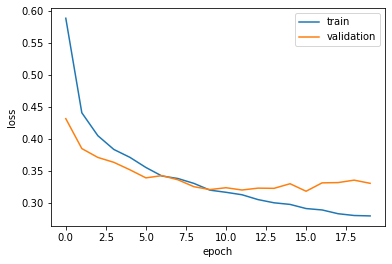

In [19]:
plt.plot(histrory.history['loss'])
plt.plot(histrory.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

> epochs가 10일 경우가 trainrhk val의 차이가 적은것 같다.   
> 기본적으로 훈련세트의 손실이 검증세트보다 적게 나오는 epochs의 갯수를 선택한다

---
### 모델의 저장과 복원
- hdf5 format으로 저장

In [20]:
# model 저장
model.save("../Data/model-whole.h5")

In [21]:
# 복원
model = keras.models.load_model("../Data/model-whole.h5")

In [22]:
# 사용해보기
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3303 - accuracy: 0.8826


[0.3303261697292328, 0.8825833201408386]

---
### Callbacks
- 훈련수행시 손실값이 제일 작은 함수를 저장해 준다 <- 굉장히 편함

In [23]:
model = model_fu(keras.layers.Dropout(0.3)) # dropout 30%
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
model.fit(train_scaled,train_target,epochs=20,
                        validation_data = (val_scaled,val_target),
                        callbacks = [checkpoint_cb]
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5976 - accuracy: 0.7897 - val_loss: 0.4352 - val_accuracy: 0.8438
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4407 - accuracy: 0.8419 - val_loss: 0.3799 - val_accuracy: 0.8618
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4035 - accuracy: 0.8549 - val_loss: 0.3638 - val_accuracy: 0.8692
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3812 - accuracy: 0.8618 - val_loss: 0.3486 - val_accuracy: 0.8700
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3643 - accuracy: 0.8671 - val_loss: 0.3455 - val_accuracy: 0.8763
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3564 - accuracy: 0.8709 - val_loss: 0.3465 - val_accuracy: 0.8752
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3451 - accuracy: 0.8736 - val_loss: 0.3339 - val_accuracy:

In [24]:
model = keras.models.load_model("../Data/best-model.h5")
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3248 - accuracy: 0.8872


[0.32477694749832153, 0.8871666789054871]

---
# Early Stopping(조기종료)
- Callbacks처럼 끝까지 기다리는 것이 아니고 hyper parameter을 선정하여 한계값을 정해 실행한다.

In [25]:
model = model_fu(keras.layers.Dropout(0.3)) # dropout 30%
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# True를 하지않으면 최저점 최저점 + alpha1, 최저점 + alpha2 중 최저점 + alpha2로 선택함
model.fit(train_scaled,train_target,epochs=20,
                        validation_data = (val_scaled,val_target),
                        callbacks = [checkpoint_cb,early_stopping_cb]
)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5966 - accuracy: 0.7912 - val_loss: 0.4358 - val_accuracy: 0.8438
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4428 - accuracy: 0.8408 - val_loss: 0.3934 - val_accuracy: 0.8567
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4027 - accuracy: 0.8543 - val_loss: 0.3849 - val_accuracy: 0.8579
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3829 - accuracy: 0.8609 - val_loss: 0.3455 - val_accuracy: 0.8766
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3669 - accuracy: 0.8669 - val_loss: 0.3480 - val_accuracy: 0.8734
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3569 - accuracy: 0.8696 - val_loss: 0.3402 - val_accuracy: 0.8747
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3438 - accuracy: 0.8729 - val_loss: 0.3384 - val_accuracy:

In [26]:
# 몇 번째 epochs에서 stop 되었는가?
early_stopping_cb.stopped_epoch

13

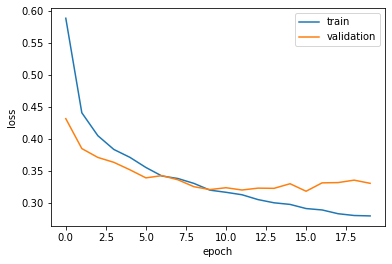

In [27]:
plt.plot(histrory.history['loss'])
plt.plot(histrory.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

### CNN(Convolution Neural Network)에서 본 심층신경망(다층 퍼셉트론)의 단점
- 입력값으로 고유 이미지 생김새 정보를 알 수 없다.  2차원 배열 자료를 1차원으로 변경하여 작업이 시작된다. 
- 심층신경망은 픽셀 하나 하나의 변화에 상당히 민감하다. 이미지 생김새를 사용할 수 없으므로 한두개의 픽셀이 모델 예측에 영향을 끼친다. 
- 픽셀 한 두개의 정보에도 민감하게 반응하기 위해 상당히 많은 변수를 모델안에 가지고 있다. 이로 인해 학습시간이 오래 걸리고 잘못하면 과대적합이 발생한다.

### 합성공 신경망(CNN:Covolution Neural Network)의 구성요소
- 밀집층 
1차원 합성곱  
- 합성곱 신경망은 노드의 가중치 갯수가 전체갯수가 아니고 정하여 사용함 (3,5개:가중치가 3개 혹은 5개)
- 입력층을 아래로 한칸 이동하여 위에서 계산한 동일한 가중치와 절편을 사용한다. 
- 밀집층보다 가중치의 갯수가 훨씬 작음. 
- 10개의 입력이 있으면 출력은 8개만 만들어짐
- 3개씩 있는 것을 필터라고 하며 필터의 커널은 3이다.

2차원 합성곱
- 이미지의 크기는 4 X 4
- 필터의 커널은 3 X 3이고 각 입력층에 곱해지는 Weight와 Bias는 동일하다.
- 발생하는 출력의 개수는 2 X 2개이다.

특성맵 (발생하는 출력물)
- 특성맵을 활성화 출력이라고도 한다. 이유는 커널과 특성맵 사이에 활성화 함수(Relu)가 들어가기 때문이다.
- 참고) w : Activate function
- 그러나 CNN에서는 특성맵이라고 불리운다.
- 2차원으로 구성된 입력층을 그대로 특성맵도 2차원으로 출력한다. (차원은 변하지않음)

여러개의 필터   
- 참고) 필터가 증가하게 되면 차원이 늘어나고 특성을 더 잘 찾을 수 있음 
- 필터가 여러개 이므로 모든 가중치와 절편이 달라야 한다.
- 특성맵의 구성은 가로 X 세로 X 필터의 갯수로 3차원이 생성됨. 

예시) 합성곱 기본 code      
&emsp;&emsp;<b>keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu')</b>          
&emsp;&emsp;10 : 필터의 갯수 , kernel_size = n by n, CNN에서는 거의 relu 함수를 이용함

Padding   
- 입력값과 동일한 특성맵의 크기를 구하는 방법으로 same패딩이 있으며, vaild는 Padding이 없이 구하는 방법이다. 

예시) 합성곱 code with Padding        
&emsp;&emsp;<b>keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding='same')</b>          

Stride   
- 필터의 이동을 한칸씩이 아닌 여러칸으로 이동할 경우, 이 이동하는 크기를 stride라고 함.   
- 아주 특수한 경우를 빼고는 stride는 1을 초과하여 사용하지 않는다.    

예시) 합성곱 code with Padding and stride       
&emsp;&emsp;<b>keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding='same',stride = 1)</b>          

Pooling층   
- 특성맵의 다음단계로 차원축소를 하는 필터   
- 최대풀링, 평균풀링으로 2종류가 있다.  

&emsp;최대풀링의 경우      
&emsp;- 풀링의 경우 계산하는 값이 픽셀과 겹치지 않는다.    
&emsp;- 풀링은 가중치가 없으며 풀링의 결과도 특성맵이라고도 한다.     